In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py

df = pd.read_csv('202012-capitalbikeshare-tripdata.csv')

In [2]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C04E20007D039277,docked_bike,2020-12-02 09:10:36,2020-12-02 09:24:12,18th St & Wyoming Ave NW,31114.0,18th St & Pennsylvania Ave NW,31242.0,38.918809,-77.041571,38.899680,-77.041539,casual
1,A488C0D9F4761D06,classic_bike,2020-12-31 12:46:29,2020-12-31 14:01:07,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
2,9E7E97A927A85552,classic_bike,2020-12-31 12:47:03,2020-12-31 14:01:04,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual


In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [4]:
df.rideable_type.value_counts()

classic_bike     48656
docked_bike      28924
electric_bike    28249
Name: rideable_type, dtype: int64

<AxesSubplot:>

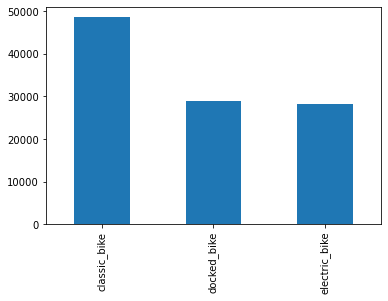

In [5]:
df.rideable_type.value_counts().plot(kind = 'bar')

<AxesSubplot:>

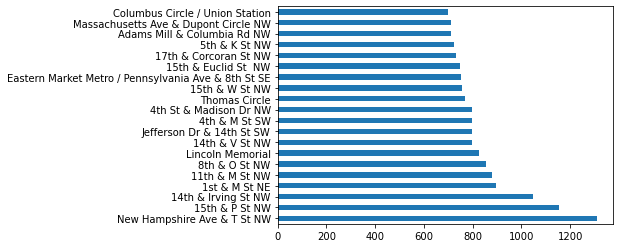

In [6]:
ride_start = df.start_station_name.value_counts()
ride_start.sort_values(ascending = False).head(20).plot(kind='barh')

<AxesSubplot:>

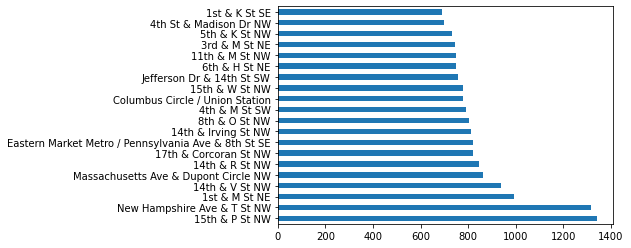

In [7]:
ride_end = df.end_station_name.value_counts()
ride_end.sort_values(ascending = False).head(20).plot(kind='barh')

In [8]:
ride_start = df.start_station_name.value_counts().nlargest(25,'all')
ride_end = df.end_station_name.value_counts().nlargest(25,'all')
ride_end = pd.DataFrame(ride_end)
ride_end.reset_index(inplace=True)
ride_end.rename(columns = {'index':'Ride End', 'end_station_name':'End Sum'}, inplace = True) 
top_stations = ride_start.copy()
top_stations = pd.DataFrame(top_stations)
top_stations.reset_index(inplace=True)
top_stations.rename(columns = {'index':'Ride Start', 'start_station_name':'Start Sum'}, inplace = True) 
top_stations['Ride End'] = ride_end['Ride End']
top_stations['End Sum'] = ride_end['End Sum']
top_stations.head(3)
#top_stations.plot(kind='barh')

,Ride Start,Start Sum,Ride End,End Sum
0,New Hampshire Ave & T St NW,1308,15th & P St NW,1339
1,15th & P St NW,1155,New Hampshire Ave & T St NW,1316
2,14th & Irving St NW,1046,1st & M St NE,992


In [9]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C04E20007D039277,docked_bike,2020-12-02 09:10:36,2020-12-02 09:24:12,18th St & Wyoming Ave NW,31114.0,18th St & Pennsylvania Ave NW,31242.0,38.918809,-77.041571,38.899680,-77.041539,casual
1,A488C0D9F4761D06,classic_bike,2020-12-31 12:46:29,2020-12-31 14:01:07,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
2,9E7E97A927A85552,classic_bike,2020-12-31 12:47:03,2020-12-31 14:01:04,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual


In [10]:
df_unique_addresses = df.copy()
df_unique_addresses = df_unique_addresses[['start_station_name', 'start_station_id', 'start_lat', 'start_lng']]
df_unique_addresses = df_unique_addresses.drop_duplicates(subset=['start_station_id'], ignore_index=True)
df_unique_addresses

,start_station_name,start_station_id,start_lat,start_lng
0,18th St & Wyoming Ave NW,31114.0,38.918809,-77.041571
1,Potomac & Pennsylvania Ave SE,31606.0,38.880300,-76.986200
2,Wakefield High School,31054.0,38.847129,-77.112550
3,Washington-Liberty High School / N Stafford St...,31920.0,38.888282,-77.111066
4,3rd St & Pennsylvania Ave SE,31269.0,38.887378,-77.001955
...,...,...,...,...
606,Baltimore Ave & Van Buren St / Riverdale Park ...,32402.0,38.969581,-76.937349
607,47th & Elm St,32021.0,38.982456,-77.091991
608,Greensboro & International Dr,32221.0,38.922864,-77.227679
609,New Dominion Pkwy & Fountain Dr,32212.0,38.960574,-77.356324


In [11]:
df_main_start_stations_id = df['start_station_id'].value_counts().nlargest(25,'all')
df_main_start_stations = df['start_station_name'].value_counts().nlargest(25,'all')
df_main_start_stations_id = pd.DataFrame(df_main_start_stations_id)
df_main_start_stations = pd.DataFrame(df_main_start_stations)
df_main_start_stations_id.reset_index(inplace=True)
df_main_start_stations.reset_index(inplace=True)
df_main_start_stations.columns = ['start_station', 'start_count']
df_main_start_stations_id.columns = ['start_station_id', 'start_count']
df_main_start_stations['station_id'] = df_main_start_stations_id.start_station_id
df_main_start_stations.head(3)

,start_station,start_count,station_id
0,New Hampshire Ave & T St NW,1308,31229.0
1,15th & P St NW,1155,31201.0
2,14th & Irving St NW,1046,31124.0


In [12]:
for j in df_main_start_stations.station_id:
    print(j, df_main_start_stations[df_main_start_stations['station_id'] == j])

31229.0                  start_station  start_count  station_id
0  New Hampshire Ave & T St NW         1308     31229.0
31201.0     start_station  start_count  station_id
1  15th & P St NW         1155     31201.0
31124.0          start_station  start_count  station_id
2  14th & Irving St NW         1046     31124.0
31603.0    start_station  start_count  station_id
3  1st & M St NE          895     31603.0
31266.0     start_station  start_count  station_id
4  11th & M St NW          879     31266.0
31281.0    start_station  start_count  station_id
5  8th & O St NW          856     31281.0
31258.0       start_station  start_count  station_id
6  Lincoln Memorial          826     31258.0
31101.0     start_station  start_count  station_id
7  14th & V St NW          798     31101.0
31247.0                start_station  start_count  station_id
8  Jefferson Dr & 14th St SW          798     31247.0
31108.0    start_station  start_count  station_id
9  4th & M St SW          797     31108.0
3128

In [50]:
print(df_unique_addresses[df_unique_addresses['start_station_id'].isnull() == True])

    start_station_name  start_station_id  start_lat  start_lng
284                NaN               NaN      38.89     -77.04


In [59]:
df_unique_addresses = df_unique_addresses.dropna()
df_unique_addresses.shape

(610, 4)

In [16]:
df_main_start_stations.head(3)

,start_station,start_count,station_id
0,New Hampshire Ave & T St NW,1308,31229.0
1,15th & P St NW,1155,31201.0
2,14th & Irving St NW,1046,31124.0


In [18]:
df_lat = []
df_long = []
df_stat_id = []
for j in df_main_start_stations.station_id:
    for i in range(len(df_unique_addresses)):
        if j == float(df_unique_addresses.start_station_id.iloc[i]):
            df_lat.append(df_unique_addresses['start_lat'][i])
            df_long.append(df_unique_addresses['start_lng'][i])
            df_stat_id.append(df_unique_addresses['start_station_id'][i])

            # df_main_start_stations['lat'] = df_unique_addresses['start_lat'][k]
            # df_main_start_stations['lon'] = df_unique_addresses['start_lng'][k]

In [19]:
df_lat = pd.DataFrame(df_lat)
df_long = pd.DataFrame(df_long)
df_stat_id = pd.DataFrame(df_stat_id)
df_test = df_stat_id
df_test['lat'] = df_lat
df_test['lon'] = df_long
df_test.columns = ['id', 'lat', 'lon']
df_test.columns

Index(['id', 'lat', 'lon'], dtype='object')

In [20]:
df_main_start_stations['lat'] = df_test.lat
df_main_start_stations['lon'] = df_test.lon
#df_main_start_stations['id'] = df_test.id

In [60]:
df_main_start_stations.head(3)

,start_station,start_count,station_id,lat,lon
0,New Hampshire Ave & T St NW,1308,31229.0,38.915544,-77.038252
1,15th & P St NW,1155,31201.0,38.909868,-77.034421
2,14th & Irving St NW,1046,31124.0,38.928552,-77.032224


In [65]:
#df_main_start_stations = df[df.start_station_name.value_counts().nlargest(25,'all')]
fig = px.scatter_mapbox(df_main_start_stations,
                    lat='lat',
                    lon='lon',
                    hover_name="start_station",
                    color_discrete_sequence=['red'],
                    zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [23]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [67]:
ride_start1 = df.start_station_name.value_counts().nlargest(25,'all')
ride_end1 = df.end_station_name.value_counts().nlargest(25,'all')
ride_end1 = pd.DataFrame(ride_end1)
ride_end1.reset_index(inplace=True)
ride_end1['Start or End'] = 1
ride_end1.rename(columns = {'index':'Station', 'end_station_name':'Sum'}, inplace = True) 

top_stations1 = ride_start1.copy()
top_stations1 = pd.DataFrame(top_stations1)
top_stations1['Start or End'] = 0
top_stations1.reset_index(inplace=True)
top_stations1.rename(columns = {'index':'Station', 'start_station_name':'Sum'}, inplace = True)
top_stations1 = top_stations1.append(ride_end1)

# top_stations.rename(columns = {'index':'Ride Start', 'start_station_name':'Start Sum'}, inplace = True) 
# top_stations['Ride End'] = ride_end['Ride End']
# top_stations['End Sum'] = ride_end['End Sum']


In [68]:
top_stations1

,Station,Sum,Start or End
0,New Hampshire Ave & T St NW,1308,0
1,15th & P St NW,1155,0
2,14th & Irving St NW,1046,0
3,1st & M St NE,895,0
4,11th & M St NW,879,0
5,8th & O St NW,856,0
6,Lincoln Memorial,826,0
7,14th & V St NW,798,0
8,Jefferson Dr & 14th St SW,798,0
9,4th & M St SW,797,0


In [73]:
# lat and lon must be added!!!

# fig = px.scatter_mapbox(top_stations1,
#                     lat='lat',
#                     lon='lon',
#                     hover_name="street",
#                     zoom=9,
#                     size='sum',
#                     color = top_stations1['Start or End'])
# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [8]:
pd.to_datetime(df.started_at, yearfirst=True)
pd.to_datetime(df.ended_at, yearfirst=True)

0        2020-12-02 09:24:12
1        2020-12-31 14:01:07
2        2020-12-31 14:01:04
3        2020-12-29 14:12:22
4        2020-12-27 12:36:12
                 ...        
105824   2020-12-12 14:17:02
105825   2020-12-03 14:06:11
105826   2020-12-06 08:03:46
105827   2020-12-21 14:26:59
105828   2020-12-18 09:23:54
Name: ended_at, Length: 105829, dtype: datetime64[ns]

In [25]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [74]:
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    11054
start_station_id      11054
end_station_name      12259
end_station_id        12259
start_lat                 0
start_lng                 0
end_lat                 204
end_lng                 204
member_casual             0
dtype: int64

In [75]:
df.shape

(105829, 13)

In [77]:
df = df.dropna()
df.shape

(89908, 13)

In [62]:
df['start_date'] = pd.to_datetime(df['started_at']).dt.date
df['start_time'] = pd.to_datetime(df['started_at']).dt.time
df['end_date'] = pd.to_datetime(df['ended_at']).dt.date
df['end_time'] = pd.to_datetime(df['ended_at']).dt.time
pd.to_datetime(df.start_date, yearfirst=True)
pd.to_datetime(df.end_date, yearfirst=True)

79151    2020-12-01
103232   2020-12-01
16062    2020-12-01
25118    2020-12-01
85445    2020-12-01
            ...    
33354    2021-01-01
88384    2021-01-01
65468    2021-01-01
94400    2021-01-01
46751    2021-01-01
Name: end_date, Length: 105829, dtype: datetime64[ns]

In [63]:
d = pd.Series(df.start_date.unique())
d.sort_values()

0     2020-12-01
1     2020-12-02
2     2020-12-03
3     2020-12-04
4     2020-12-05
5     2020-12-06
6     2020-12-07
7     2020-12-08
8     2020-12-09
9     2020-12-10
10    2020-12-11
11    2020-12-12
12    2020-12-13
13    2020-12-14
14    2020-12-15
15    2020-12-16
16    2020-12-17
17    2020-12-18
18    2020-12-19
19    2020-12-20
20    2020-12-21
21    2020-12-22
22    2020-12-23
23    2020-12-24
24    2020-12-25
25    2020-12-26
26    2020-12-27
27    2020-12-28
28    2020-12-29
29    2020-12-30
30    2020-12-31
dtype: object

In [64]:
d = pd.Series(df.end_date.unique())
d.sort_values()

20    2020-11-25
21    2020-11-26
0     2020-12-01
1     2020-12-02
2     2020-12-03
4     2020-12-04
5     2020-12-05
9     2020-12-06
11    2020-12-07
6     2020-12-08
7     2020-12-09
13    2020-12-10
3     2020-12-11
15    2020-12-12
14    2020-12-13
19    2020-12-14
17    2020-12-15
16    2020-12-16
22    2020-12-17
23    2020-12-18
24    2020-12-19
27    2020-12-20
10    2020-12-21
25    2020-12-22
18    2020-12-23
30    2020-12-24
28    2020-12-25
31    2020-12-26
26    2020-12-27
32    2020-12-28
12    2020-12-29
33    2020-12-30
34    2020-12-31
29    2021-01-01
8     2021-01-02
35    2021-01-03
dtype: object

In [87]:
df[df.start_date > df.end_date].count()

ride_id               535
rideable_type         535
started_at            535
ended_at              535
start_station_name    483
start_station_id      483
end_station_name      477
end_station_id        477
start_lat             535
start_lng             535
end_lat               535
end_lng               535
member_casual         535
start_date            535
start_time            535
end_date              535
end_time              535
dtype: int64

In [ ]:
df[df.start_date > df.end_date].head(3)

In [95]:
df = df[df.start_date <= df.end_date]

In [96]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,94292.000000,93093.000000,105294.000000,105294.000000,105090.000000,105090.000000
mean,31362.678329,31363.794947,38.906652,-77.030716,38.905618,-77.030459
std,254.567638,253.216325,0.027208,0.031487,0.027037,0.031329
min,31000.000000,31000.000000,38.780000,-77.363094,38.710000,-77.363094
25%,31202.000000,31205.000000,38.892459,-77.043600,38.892934,-77.043680
50%,31275.000000,31274.000000,38.905469,-77.031617,38.903827,-77.031500
75%,31605.000000,31605.000000,38.919018,-77.013500,38.916723,-77.012489
max,32901.000000,32901.000000,39.123513,-76.825535,39.123513,-76.825533


In [ ]:
df.head(3)

In [176]:
df.started_at = pd.to_datetime(df.started_at)

In [39]:
df.started_at

0         2020-12-02 09:10:36
1         2020-12-31 12:46:29
2         2020-12-31 12:47:03
3         2020-12-29 13:50:51
4         2020-12-27 12:30:28
                 ...         
105824    2020-12-12 13:49:55
105825    2020-12-03 13:43:26
105826    2020-12-06 07:27:47
105827    2020-12-21 13:46:01
105828    2020-12-18 09:09:48
Name: started_at, Length: 105829, dtype: object

In [ ]:
for i in range(len(df)):
    df['weekday'] = df['started_at'][i].day_name()
df.head()

In [55]:
df = df.sort_values(by=['started_at', 'ended_at'])

In [56]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
79151,4269E58FC83E91AA,docked_bike,2020-12-01 00:02:29,2020-12-01 00:16:37,Connecticut & Nebraska Ave NW,31310.0,Columbia Rd & Belmont St NW,31113.0,38.955016,-77.069956,38.920669,-77.043680,member
103232,1894D51DDCE6F69D,docked_bike,2020-12-01 00:05:07,2020-12-01 00:20:11,17th & K St NW / Farragut Square,31233.0,8th & H St NW,31228.0,38.902061,-77.038322,38.899700,-77.023086,member
16062,D9996DB185E58CA8,docked_bike,2020-12-01 00:07:14,2020-12-01 00:24:17,Wisconsin Ave & O St NW,31312.0,15th St & Constitution Ave NW,31321.0,38.908490,-77.063586,38.892244,-77.033234,member
25118,176FBB705914A758,electric_bike,2020-12-01 00:11:15,2020-12-01 00:21:10,14th & Newton St NW,31649.0,NaN,NaN,38.932094,-77.033062,38.960000,-77.040000,casual
85445,86DB8E168B046FCC,electric_bike,2020-12-01 00:13:42,2020-12-01 00:22:42,NaN,NaN,16th & Irving St NW,31122.0,38.910000,-77.050000,38.928849,-77.036233,casual


In [153]:
start_stat = pd.DataFrame(df.groupby(['start_station_name', 'end_station_name'])['start_date'].count())
start_stat.reset_index(inplace=True)
start_stat.sort_values(by='start_date', ascending = False).head(20)

,start_station_name,end_station_name,start_date
5189,15th St & Constitution Ave NW,15th St & Constitution Ave NW,141
19799,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,134
19326,Hains Point/Buckeye & Ohio Dr SW,Hains Point/Buckeye & Ohio Dr SW,115
12577,4th St & Madison Dr NW,4th St & Madison Dr NW,106
6273,17th St & Independence Ave SW,17th St & Independence Ave SW,100
20767,Lincoln Memorial,Lincoln Memorial,91
19250,Gravelly Point,Gravelly Point,88
25255,Smithsonian-National Mall / Jefferson Dr & 12t...,Smithsonian-National Mall / Jefferson Dr & 12t...,87
23753,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,83
18288,Fenton St & Ellsworth Dr,Fenton St & Ellsworth Dr,77


In [152]:
df[df.start_station_name == df.end_station_name].count()

ride_id               6983
rideable_type         6983
started_at            6983
ended_at              6983
start_station_name    6983
start_station_id      6983
end_station_name      6983
end_station_id        6983
start_lat             6983
start_lng             6983
end_lat               6983
end_lng               6983
member_casual         6983
start_date            6983
start_time            6983
end_date              6983
end_time              6983
dtype: int64

In [164]:
start_stat2 = df[df.start_station_name == df.end_station_name]
start_stat2 = pd.DataFrame(start_stat2.groupby(['start_station_name', 'end_station_name', 'started_at', 'ended_at'])['start_date'].count())
start_stat2.reset_index(inplace=True)
start_stat2.sort_values(by='start_date', ascending = False).head(20)

,start_station_name,end_station_name,started_at,ended_at,start_date
3224,8th & H St NW,8th & H St NW,2020-12-12 16:35:19,2020-12-12 17:20:00,2
0,10th & E St NW,10th & E St NW,2020-12-07 14:23:17,2020-12-07 14:23:19,1
4650,Henry Bacon Dr & Lincoln Memorial Circle NW,Henry Bacon Dr & Lincoln Memorial Circle NW,2020-12-31 12:37:21,2020-12-31 13:22:30,1
4661,Hyattsville Library / Adelphi Rd & Toledo Rd,Hyattsville Library / Adelphi Rd & Toledo Rd,2020-12-28 13:11:39,2020-12-28 13:35:02,1
4660,Hyattsville Library / Adelphi Rd & Toledo Rd,Hyattsville Library / Adelphi Rd & Toledo Rd,2020-12-13 07:18:40,2020-12-13 07:48:15,1
4659,Hyattsville Library / Adelphi Rd & Toledo Rd,Hyattsville Library / Adelphi Rd & Toledo Rd,2020-12-12 08:08:40,2020-12-12 08:36:25,1
4658,Hyattsville Library / Adelphi Rd & Toledo Rd,Hyattsville Library / Adelphi Rd & Toledo Rd,2020-12-11 15:41:50,2020-12-11 16:22:32,1
4657,Hyattsville Library / Adelphi Rd & Toledo Rd,Hyattsville Library / Adelphi Rd & Toledo Rd,2020-12-07 11:54:42,2020-12-07 12:42:24,1
4656,Henry St & Pendleton St,Henry St & Pendleton St,2020-12-20 16:44:44,2020-12-20 17:01:05,1
4655,Henry St & Pendleton St,Henry St & Pendleton St,2020-12-20 16:44:25,2020-12-20 17:00:36,1


In [168]:
#pd.Series(df.start_station_name.unique()).count()
pd.Series(df.end_station_name.unique()).count()

609